## Airbnb Listing

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("F:\\Jupyter\\ab_us_2020.csv", dtype={'neighbourhood_group': object}) #sesuaikan path
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville
5,209068,Terrace Cottage,1029919,Kevin,NaN,28804,35.61856,-82.55276,Entire home/apt,134,7,54,14/01/20,0.49,1,294,Asheville
6,213006,Blue Gate West,1098412,Susanne,NaN,28806,35.58345,-82.59713,Private room,48,1,137,30/11/19,1.35,1,0,Asheville
7,246315,Asheville Dreamer's Cabin,1292070,Annie,NaN,28805,35.59635,-82.50655,Private room,65,3,57,30/10/19,0.53,2,106,Asheville
8,259576,"Private, peaceful, and free goat therapy",1362726,Julia,NaN,28805,35.61929,-82.48114,Entire home/apt,71,28,537,05/04/20,5.01,1,207,Asheville
9,295496,The Fern Street Apt near Biltmore,1501882,Debbie,NaN,28803,35.55537,-82.53539,Entire home/apt,50,90,31,14/06/19,0.29,1,339,Asheville


### # Memahami Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

Menurut output di atas, terdapat beberapa attribute yang memiliki value NaN, yaitu, 'name', 'host_name', 'neighbouthood_group', 'last_review', dan 'reviews_per_months'.

Maka, perlu adanya penanganan apakah data akan diabaikan (hapus) atau diisi otomatis.

### # Menangani NaN data

In [4]:
df.isnull().sum()

id                                     0
name                                  28
host_id                                0
host_name                             33
neighbourhood_group               115845
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48602
reviews_per_month                  48602
calculated_host_listings_count         0
availability_365                       0
city                                   0
dtype: int64

Tampilan lebih detail

In [5]:
df['reviews_per_month'].fillna(value=0, inplace=True)

In [6]:
df.neighbourhood_group.value_counts(dropna = False)

NaN                     115845
Manhattan                20236
Brooklyn                 18263
City of Los Angeles      17544
Other Cities             11463
Maui                      7897
Honolulu                  6313
Queens                    5746
Hawaii                    4977
Kauai                     3247
Unincorporated Areas      2529
Newport                   1412
Other neighborhoods       1253
Washington                1201
Bronx                     1185
Providence                1056
Downtown                  1043
Capitol Hill               682
Central Area               572
Queen Anne                 459
West Seattle               378
Ballard                    369
Rainier Valley             357
Staten Island              326
Cascade                    268
Beacon Hill                252
University District        238
Delridge                   201
Northgate                  150
Magnolia                   132
Lake City                  118
Kent                       108
Bristol 

In [7]:
df['neighbourhood_group'].fillna(value='Other neighborhoods', inplace=True)

Dilakukan penghapusan tiga atribut, yaitu atribut host_name, id, dan last review karena ketiga atribut tersebut tidak dibutuhkan dalam proses pembuatan model ini.

In [8]:
df.neighbourhood_group.value_counts(dropna = False)

Other neighborhoods     117098
Manhattan                20236
Brooklyn                 18263
City of Los Angeles      17544
Other Cities             11463
Maui                      7897
Honolulu                  6313
Queens                    5746
Hawaii                    4977
Kauai                     3247
Unincorporated Areas      2529
Newport                   1412
Washington                1201
Bronx                     1185
Providence                1056
Downtown                  1043
Capitol Hill               682
Central Area               572
Queen Anne                 459
West Seattle               378
Ballard                    369
Rainier Valley             357
Staten Island              326
Cascade                    268
Beacon Hill                252
University District        238
Delridge                   201
Northgate                  150
Magnolia                   132
Lake City                  118
Kent                       108
Bristol                    107
Seward P

In [9]:
df.isnull().sum()

id                                    0
name                                 28
host_id                               0
host_name                            33
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       48602
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
city                                  0
dtype: int64

In [14]:
df['name'].fillna(value="Unknown Listing", inplace=True)

Melakukan pengisian nama "Unknown Listing" pada attribute 'name' yang memiliki value NaN

In [15]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            33
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       48602
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
city                                  0
dtype: int64

Data NaN telah ditangani. Sisa output yang memiliki attribute NaN di atas adalah attribute yang akan dihapus karena tidak berhubungan dengan analisis data.

### # Menghapus Data yang Tidak Perlu

In [16]:
df = df.drop(["host_name", "id", "last_review"],axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   name                            226030 non-null  object 
 1   host_id                         226030 non-null  int64  
 2   neighbourhood_group             226030 non-null  object 
 3   neighbourhood                   226030 non-null  object 
 4   latitude                        226030 non-null  float64
 5   longitude                       226030 non-null  float64
 6   room_type                       226030 non-null  object 
 7   price                           226030 non-null  int64  
 8   minimum_nights                  226030 non-null  int64  
 9   number_of_reviews               226030 non-null  int64  
 10  reviews_per_month               226030 non-null  float64
 11  calculated_host_listings_count  226030 non-null  int64  
 12  availability_365

### # Memahami dan Menghapus Outliers

Dalam menangani outliers, dapat menggunakan IQR rule, yaitu data yang di luar dari batas atas dan bawah.

Text(0.5, 1.0, 'reviews_per_month')

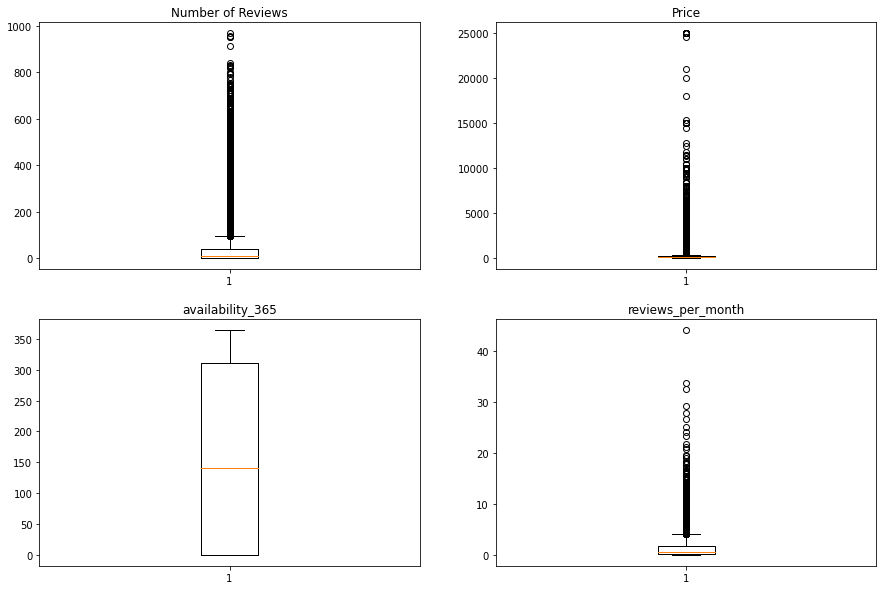

In [18]:
plt.figure(figsize = (15, 10))
ax=plt.subplot(221)
plt.boxplot(df['number_of_reviews'])
ax.set_title('Number of Reviews')
ax=plt.subplot(222)
plt.boxplot(df['price'])
ax.set_title('Price')
ax=plt.subplot(223)
plt.boxplot(df['availability_365'])
ax.set_title('availability_365')
ax=plt.subplot(224)
plt.boxplot(df['reviews_per_month'])
ax.set_title('reviews_per_month')

Dapat terlihat bahwa hanya 'availability_365' yang memiliki sebaran bagus.

In [19]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 *IQR)
df1=df.loc[filter]

Q1 = df1['number_of_reviews'].quantile(0.25)
Q3 = df1['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1

filter = (df1['number_of_reviews'] >= Q1 - 1.5 * IQR) & (df1['number_of_reviews'] <= Q3 + 1.5 *IQR)
df2=df1.loc[filter]


Q1 = df2['reviews_per_month'].quantile(0.25)
Q3 = df2['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1

filter = (df2['reviews_per_month'] >= Q1 - 1.5 * IQR) & (df2['reviews_per_month'] <= Q3 + 1.5 *IQR)
df_new=df2.loc[filter]

Text(0.5, 1.0, 'reviews_per_month')

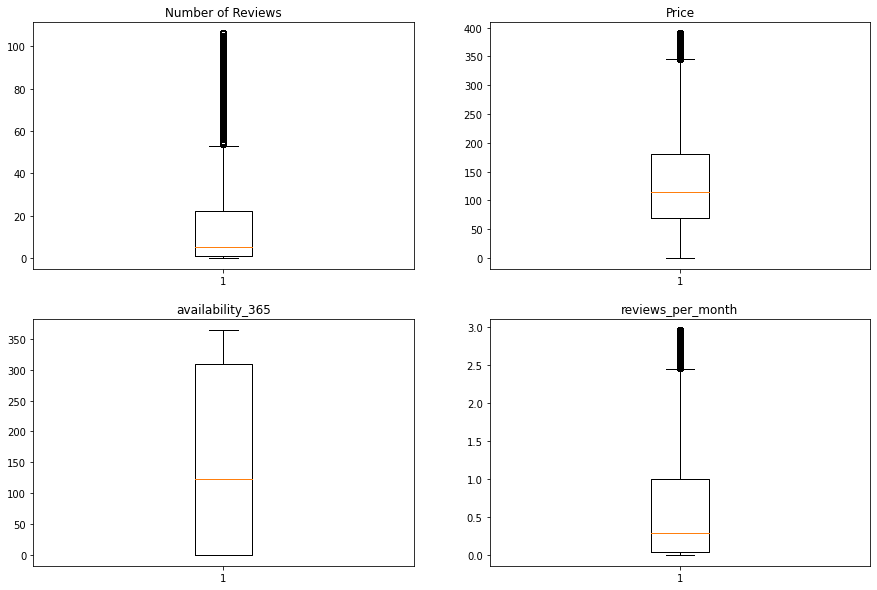

In [20]:
plt.figure(figsize = (15, 10))
ax=plt.subplot(221)
plt.boxplot(df_new['number_of_reviews'])
ax.set_title('Number of Reviews')
ax=plt.subplot(222)
plt.boxplot(df_new['price'])
ax.set_title('Price')
ax=plt.subplot(223)
plt.boxplot(df_new['availability_365'])
ax.set_title('availability_365')
ax=plt.subplot(224)
plt.boxplot(df_new['reviews_per_month'])
ax.set_title('reviews_per_month')

Berdasar pada output di atas, sebaran data sudah membaik. Masih terdapat data yang berada di batas atas yang dipertahankan karena bilamana dihapus, data tersebut tidak dapat merepresentasikan data awal.

In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171236 entries, 2 to 226029
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   name                            171236 non-null  object 
 1   host_id                         171236 non-null  int64  
 2   neighbourhood_group             171236 non-null  object 
 3   neighbourhood                   171236 non-null  object 
 4   latitude                        171236 non-null  float64
 5   longitude                       171236 non-null  float64
 6   room_type                       171236 non-null  object 
 7   price                           171236 non-null  int64  
 8   minimum_nights                  171236 non-null  int64  
 9   number_of_reviews               171236 non-null  int64  
 10  reviews_per_month               171236 non-null  float64
 11  calculated_host_listings_count  171236 non-null  int64  
 12  availability_365

df_new adalah copy dari data asli yang sudah diproses menggunakan metode di atas.

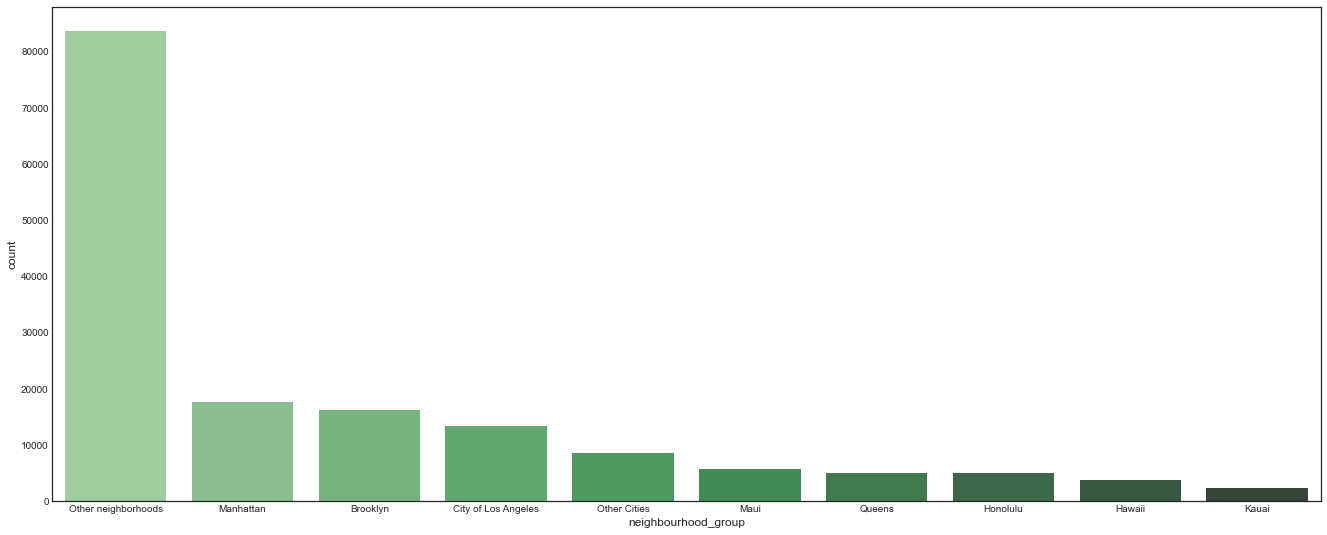

In [45]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

plt.subplot(221)
sns.countplot(x="neighbourhood_group", data=df_new, palette="Greens_d", order=df_new.neighbourhood_group.value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(50,20)

Menampilkan lokasi dengan jumlah kunjungan terbanyak.
Namun, terdapat "other"location yang mendominasi tetapi tidak merepresentasikan sebuah lokasi spesifik. Maka, dapat menggunakan data yang dimulai dari posisi ke-2.

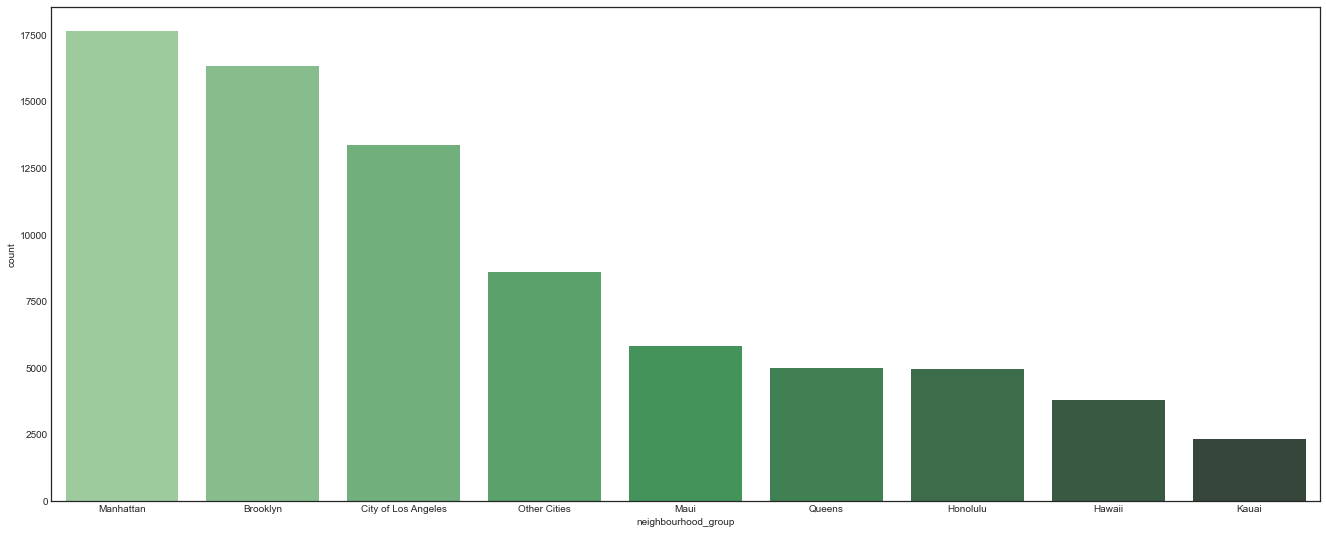

In [27]:
plt.subplot(221)
sns.countplot(x="neighbourhood_group", data=df_new, palette="Greens_d", order=df_new.neighbourhood_group.value_counts().iloc[1:10].index)
fig = plt.gcf()
fig.set_size_inches(50,20)

In [29]:
df_new.neighbourhood_group.value_counts()

Other neighborhoods     83760
Manhattan               17670
Brooklyn                16335
City of Los Angeles     13390
Other Cities             8594
Maui                     5829
Queens                   5015
Honolulu                 4956
Hawaii                   3798
Kauai                    2328
Unincorporated Areas     1908
Bronx                    1027
Washington                841
Newport                   818
Providence                776
Downtown                  756
Capitol Hill              469
Central Area              375
Queen Anne                295
Staten Island             266
West Seattle              259
Ballard                   255
Rainier Valley            248
Cascade                   224
University District       211
Beacon Hill               150
Delridge                  135
Northgate                 118
Magnolia                   97
Lake City                  91
Kent                       80
Bristol                    79
Seward Park                52
Interbay  

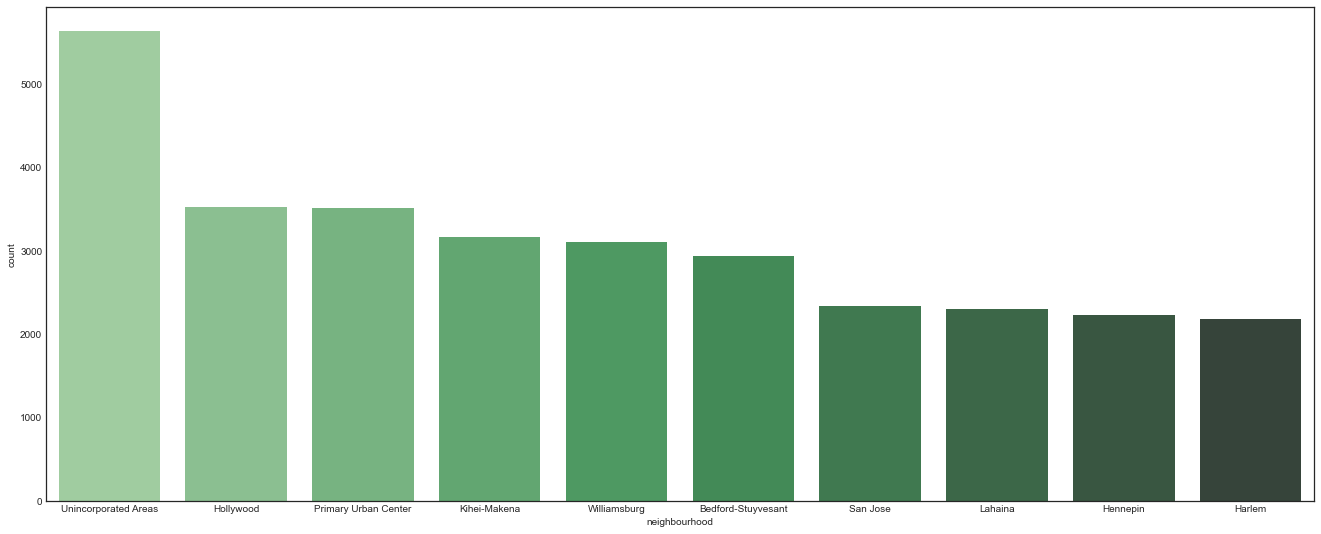

In [28]:
plt.subplot(221)
sns.countplot(x="neighbourhood", data=df_new, palette="Greens_d", order=df_new.neighbourhood.value_counts().iloc[:10].index)
fig = plt.gcf()
fig.set_size_inches(50,20)

In [30]:
df_new.neighbourhood.value_counts()

Unincorporated Areas        5642
Hollywood                   3523
Primary Urban Center        3521
Kihei-Makena                3171
Williamsburg                3109
                            ... 
Viavant - Venetian Isles       1
Cudahy                         1
Lakeshore - Lake Vista         1
Iveywood                       1
Russell                        1
Name: neighbourhood, Length: 1442, dtype: int64

Top 10 area yang terbanyak dikunjungi.

### Mengetahui Sebaran Geografis

<Figure size 720x720 with 0 Axes>

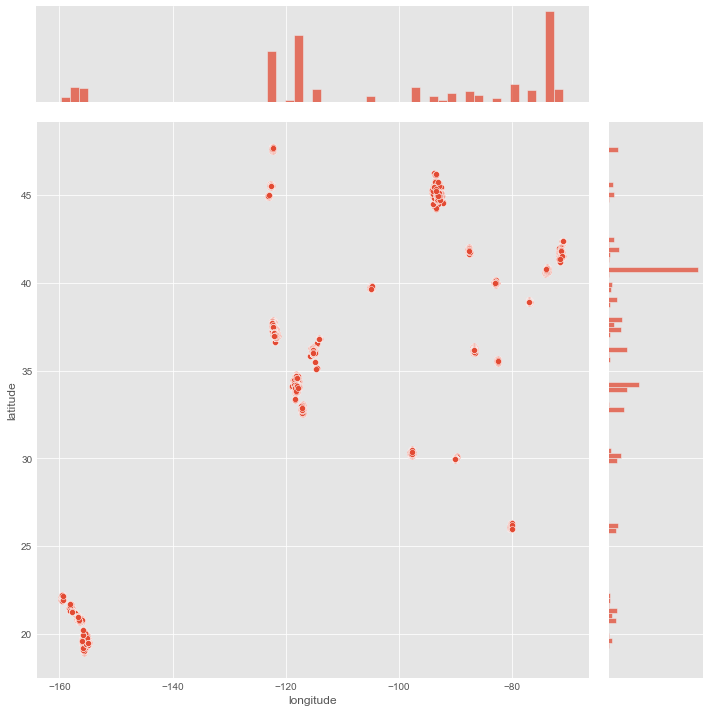

In [49]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')

sns.jointplot(x=df_new.longitude, y=df_new.latitude, height=10)
plt.ylabel('Latitude', fontsize=12)
plt.xlabel('Longitude', fontsize=12)
plt.show()

Melalui plot di atas, dapat dipahami bahwa:

+Longitude -80 sampai -60 menempati posisi pertama daerah dengan listing terbanyak.
Diikuti oleh longitude -110 sampai -125

+Latitude 40 sampai 44 menempati posisi pertama daerah dengan listing terbanyak
Diikuti oleh latitude 32 sampai 35

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

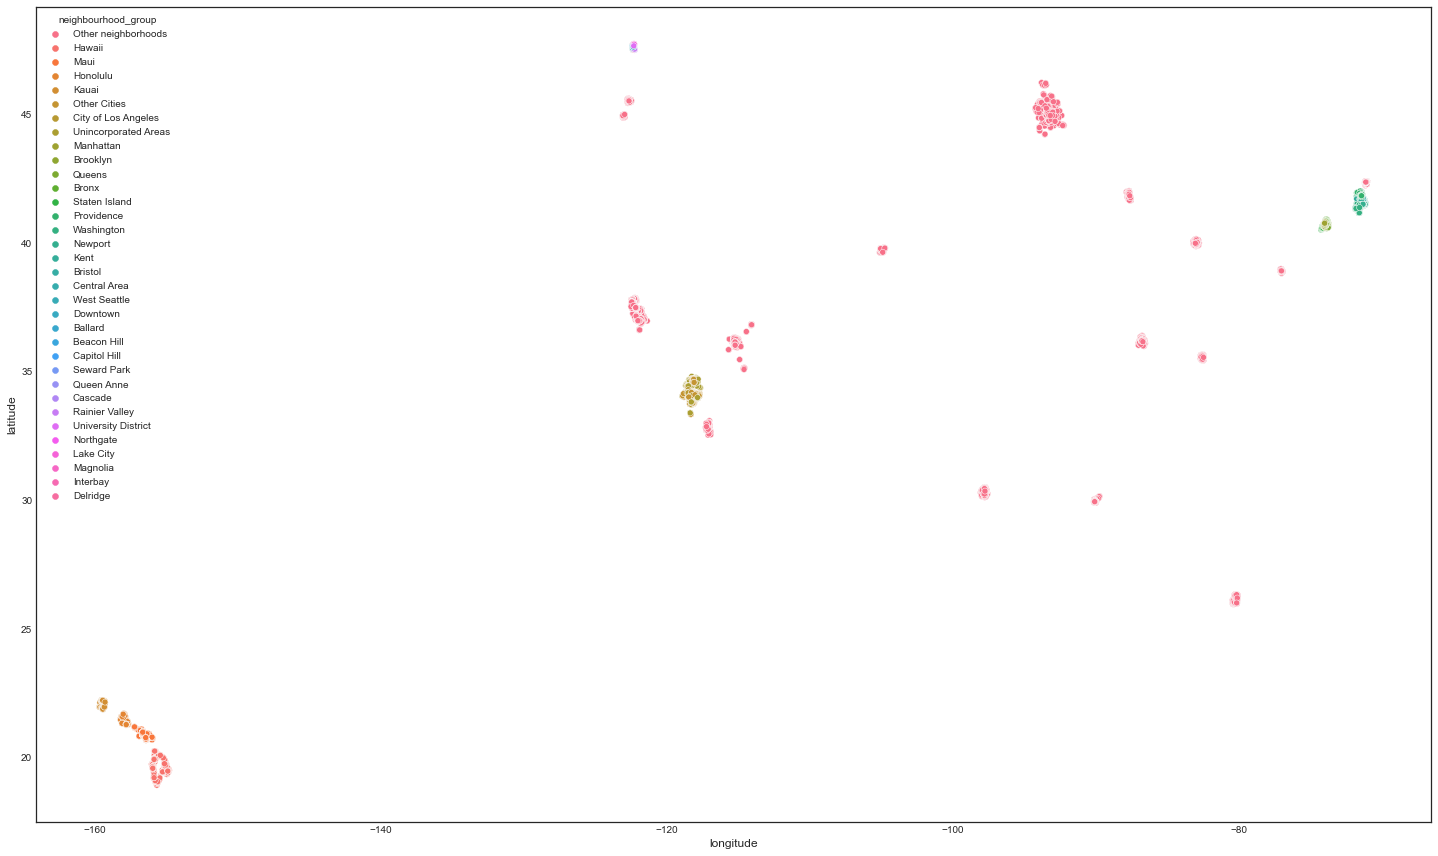

In [47]:
plt.figure(figsize = (25, 15))
sns.scatterplot(x="longitude", y="latitude",hue="neighbourhood_group", data=df_new)

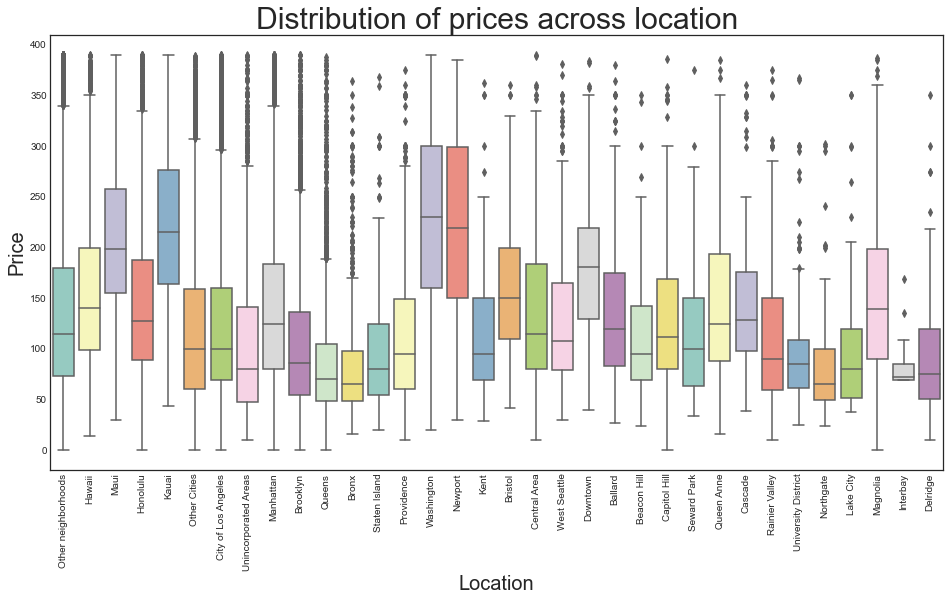

In [46]:
plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = df_new['neighbourhood_group'], y =df_new["price"], data = df_new, palette = 'Set3')
ax.set_xlabel(xlabel = 'Location', fontsize = 20)
ax.set_ylabel(ylabel = 'Price', fontsize = 20)
ax.set_title(label = 'Distribution of prices across location', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

Rata-rata harga di lokasi Manhattan, Brooklyn, City of LA berturut-turut adalah, 125 dollars, 60 dollars, dan 100 dollars.

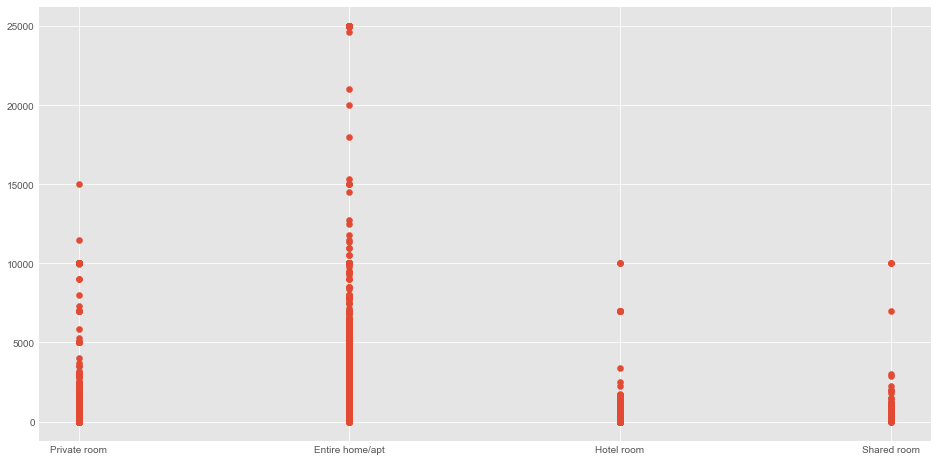

In [35]:
sns.scatter(df.room_type,df.price)

Sebaran data harga pada berbagai jenis ruangan.